In [1]:
import pandas as pd # Mengimpor pustaka pandas untuk manipulasi data tabel.
import numpy as np # Mengimpor pustaka numpy untuk operasi numerik yang efisien.
import matplotlib.pyplot as plt # Mengimpor pustaka matplotlib untuk visualisasi data.
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi data yang lebih interaktif.
from sklearn.linear_model import LogisticRegression  # Mengimpor model regresi logistik dari sklearn.
from sklearn.preprocessing import LabelEncoder # Mengimpor LabelEncoder untuk mengubah variabel kategorikal menjadi numerik.
from sklearn.preprocessing import StandardScaler # Mengimpor StandardScaler untuk menyesuaikan skala fitur numerik.
from sklearn.model_selection import cross_val_score # Mengimpor cross_val_score untuk evaluasi model menggunakan cross-validation.
from sklearn.model_selection import train_test_split # Mengimpor train_test_split untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn import metrics # Mengimpor metrics dari sklearn untuk evaluasi model.
from sklearn.metrics import confusion_matrix # Mengimpor confusion_matrix untuk evaluasi hasil klasifikasi.


In [2]:
df = pd.read_csv('Transformed Data Set - Sheet1.csv')# Membaca file CSV dan menyimpannya ke dalam DataFrame 'df'.
df # Menampilkan DataFrame 'df' untuk mengecek data yang telah dimuat.

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [3]:
df.describe() # Menampilkan ringkasan statistik dari DataFrame 'df', seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik.

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [4]:
df.info() # Menampilkan informasi singkat tentang DataFrame 'df', termasuk jumlah baris dan kolom, nama kolom, tipe data, dan apakah terdapat nilai null (NaN) dalam setiap kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.isnull().sum() # Menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame 'df' dan menampilkan total nilai null untuk setiap kolom.

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [6]:
X=df.drop(['Gender'],axis=1) # Menghapus kolom 'Gender' dari DataFrame 'df' dan menyimpan hasilnya ke dalam DataFrame 'X'.
Y=df['Gender']  # Memilih kolom 'Gender' dari DataFrame 'df' dan menyimpannya ke dalam Series 'Y'.
X.shape,Y.shape # Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame 'X' dan jumlah elemen dari Series 'Y'.

((66, 4), (66,))

In [7]:
# Membagi dataset menjadi data latih dan data uji
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
# Menggunakan LabelEncoder untuk mengubah kolom string menjadi numerik
label_encoders = {}
for column in X_train.columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column]=le

In [9]:
# Membuat dan melatih model Regresi Logistik
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [10]:
print(model.coef_) # Mencetak koefisien (bobot) yang diperoleh dari model regresi logistik yang telah dilatih, yang menunjukkan kontribusi setiap fitur terhadap prediksi kelas.

[[-0.26000166 -0.17362339 -0.11955988  0.19735981]]


In [11]:
Y_pred = pd.Series(model.predict(X_test))# Menggunakan model untuk membuat prediksi kelas pada data uji X_test dan menyimpannya sebagai Series 'Y_pred'.
Y_test = Y_test.reset_index(drop=True)# Mereset indeks dari Y_test untuk memastikan konsistensi saat menggabungkan dengan Y_pred.
z = pd.concat([Y_test,Y_pred], axis=1)# Menggabungkan Series Y_test dan Y_pred secara berdampingan menjadi DataFrame 'z'.
z.columns = ['True','Prediction']# Mengubah nama kolom DataFrame 'z' menjadi 'True' dan 'Prediction'.
z.head()# Menampilkan lima baris pertama dari DataFrame 'z' untuk melihat hasil prediksi dan nilai sebenarnya.

,True,Prediction
0,M,M
1,F,M
2,F,M
3,M,M
4,M,M


In [12]:
print("Accuracy", metrics.accuracy_score(Y_test,Y_pred)) # Mencetak akurasi dari model, yang mengukur seberapa akurat model dalam mengklasifikasikan data uji.
print("Precision", metrics.precision_score(Y_test,Y_pred,pos_label="M"))# Mencetak presisi dari model untuk kelas 'M', yang mengukur seberapa tepat model dalam mengklasifikasikan data positif.
print("Recall", metrics.recall_score(Y_test,Y_pred,pos_label="M"))# Mencetak recall dari model untuk kelas 'M', yang mengukur seberapa banyak data positif yang terklasifikasi dengan benar oleh model.

Accuracy 0.5714285714285714
Precision 0.75
Recall 0.6


In [13]:
print("Accuracy", metrics.accuracy_score(Y_test,Y_pred))# Mencetak akurasi dari model, yang mengukur seberapa akurat model dalam mengklasifikasikan data uji.
print("Precision", metrics.precision_score(Y_test,Y_pred,pos_label="F"))# Mencetak presisi dari model untuk kelas 'F', yang mengukur seberapa tepat model dalam mengklasifikasikan data negatif.
print("Recall", metrics.recall_score(Y_test,Y_pred,pos_label="F"))# Mencetak recall dari model untuk kelas 'F', yang mengukur seberapa banyak data negatif yang terklasifikasi dengan benar oleh model.

Accuracy 0.5714285714285714
Precision 0.3333333333333333
Recall 0.5


Text(0.5, 23.52222222222222, 'True')

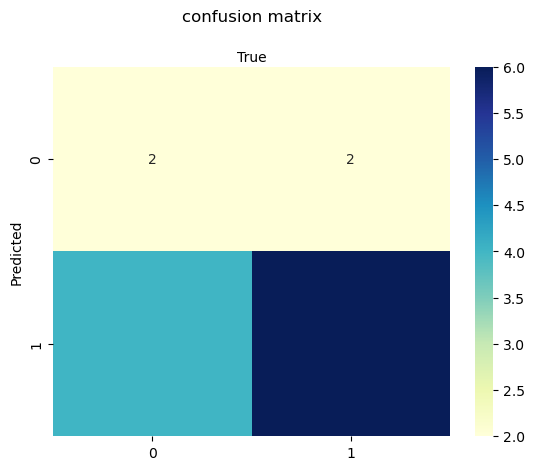

In [14]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)# Menghitung confusion matrix (matriks kebingungan) dari prediksi model terhadap data uji.
labels = [0, 1]# Label untuk sumbu x dan y pada heatmap.
fig,ax = plt.subplots()# Membuat subplots untuk plot heatmap.
tick_marks = np.arange(len(labels))# Mengatur tanda-tanda sumbu x dan y berdasarkan jumlah label.

plt.xticks(tick_marks,labels)# Menentukan tanda sumbu x berdasarkan label.
plt.yticks(tick_marks,labels)# Menentukan tanda sumbu y berdasarkan label.
#Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")# Mengatur posisi label sumbu x ke atas heatmap.
plt.title('confusion matrix',y=1.1)# Menentukan judul plot heatmap.
plt.ylabel('Predicted')# Menentukan label sumbu y sebagai "Predicted".
plt.xlabel('True')# Menentukan label sumbu x sebagai "True".

In [15]:
import joblib # Mengimpor modul joblib untuk menyimpan model ke file
joblib.dump(model,'Rendi.joblib')# Menyimpan model ke dalam file 'Rendi.joblib' menggunakan joblib.dump().

['Rendi.joblib']